# Decompose free space into convex polygons

In [1]:
import os
os.chdir('..')

In [75]:
import os, sys, time, copy, argparse
import numpy as np
import yaml
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
sys.path.insert(0, '../')

from matplotlib.ticker import FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt

from mfboTrajectory.minSnapTrajectoryPolytopes import MinSnapTrajectoryPolytopes
from mfboTrajectory.multiFidelityModelPolytopes import get_waypoints_plane, meta_low_fidelity_multi

# with open("optimize_alpha_traj_13_1.npy", "rb") as f:
#     t_set_sim1 = np.load(f)
#     d_ordered1 = np.load(f)
#     d_ordered_yaw1 = np.load(f)
#     alpha1 = np.load(f)
# with open("optimize_alpha_traj_14_1.npy", "rb") as f:
#     t_set_sim2 = np.load(f)
#     d_ordered2 = np.load(f)
#     d_ordered_yaw2 = np.load(f)
#     alpha2 = np.load(f)
# alpha1 = alpha1 * np.ones((1,4))
# alpha1 = alpha2 * np.ones((1,4))
# polygon_filedir = './constraints_data'
# polygon_filename = 'polytopes_constraints.yaml'

# points1, plane_pos_set1, t_set_sta1, waypoints1 = get_waypoints_plane(polygon_filedir, polygon_filename, "traj_13", flag_t_set=True)
# points2, plane_pos_set2, t_set_sta2, waypoints2 = get_waypoints_plane(polygon_filedir, polygon_filename, "traj_14", flag_t_set=True)

# poly = MinSnapTrajectoryPolytopes(drone_model="default", yaw_mode=0, qp_optimizer="osqp")

# traj1, traj2 = poly.plot_trajectory_multi(t_set_sim1, d_ordered1, plane_pos_set1, t_set_sim2, d_ordered2, plane_pos_set2)

# X = np.array([0.65545811,0.40646523,0.8802627,0.85447426,0.58979782,0.47212551,0.55526965,1.17946731])
# X = np.array([0.18280745, 0.53792286, 0.72261374, 0.30369784, 0.33843114, 0.38229916, 0.52360649, 0.5027051])
X = np.array([0.72503527, 0.33764299, 0.79585005, 0.60750649, 0.74600999, 0.31666828, 0.91471528, 0.48864126])

alpha1 = X[range(4)]
alpha2 = X[range(4,8)]
alpha_tmp1 = .1 + (1.9-.1) * alpha1
alpha_tmp2 = .1 + (1.9-.1) * alpha2


t_set_new1, d_ordered1, d_ordered_yaw1 = poly.update_traj(t_set_sta1, 
                                                          points1, 
                                                          plane_pos_set1, 
                                                          waypoints1, 
                                                          alpha_tmp1,
                                                          flag_fixed_end_point=False,
                                                          flag_fixed_point=False)
print(2)
t_set_new2, d_ordered2, d_ordered_yaw2 = poly.update_traj(t_set_sta2, 
                                                          points2, 
                                                          plane_pos_set2, 
                                                          waypoints2, 
                                                          alpha_tmp2,
                                                            flag_fixed_end_point=False, \
                                                            flag_fixed_point=False)
traj1, traj2 = poly.plot_trajectory_multi(t_set_sta1, d_ordered1, plane_pos_set1, t_set_sta2, d_ordered2, plane_pos_set2)
poly.sanity_check_multi(t_set_sta1*alpha_tmp1, d_ordered1, d_ordered_yaw1, t_set_sta2*alpha_tmp2, d_ordered2, d_ordered_yaw2)
poly.sanity_check_multi(t_set_new1, d_ordered1, d_ordered_yaw1, t_set_new2, d_ordered2, d_ordered_yaw2)

2


False

In [106]:
x = np.random.rand(2, 4)

In [101]:
np.sum(x, axis=1)

array([0.5441399 , 2.33040321])

In [105]:
x[:, :2]

array([[0.14184904, 0.31408629],
       [0.56511278, 0.88555753]])

In [77]:
sum(X[:2])

1.06267826

In [80]:
sum(X[4:6])

1.0626782700000001

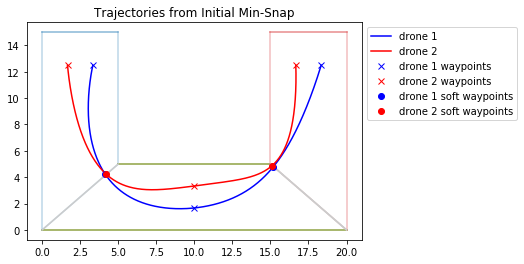

In [73]:
%matplotlib inline
plt.figure()
n=len(traj1)
h1, = plt.plot(traj1[:n, 0], traj1[:n, 1], 'b', label="drone 1")
h2, = plt.plot(traj2[:n, 0], traj2[:n, 1], 'r', label="drone 2")

# plt.plot(traj1[:, 0], traj1[:, 1], alpha=.2, color='C0')
# plt.plot(traj2[:, 0], traj2[:, 1], alpha=.2, color='C1')

# for point in points1:
#     plt.plot(point[0], point[1], 'o', color='C0')
for i, dict in enumerate(plane_pos_set1):
    for c in dict['constraints_plane']:
        h7, = plt.plot([c[0][0], c[1][0]], [c[0][1], c[1][1]], color=f"C{i}", alpha=.3, label="polytope constraints")
for i, dict in enumerate(plane_pos_set1):
    o = dict["output_plane"]
    if len(o)>0:
        h8, = plt.plot([o[0][0], o[1][0]], [o[0][1], o[1][1]], color=[.8, .8, .8], label="polytope crossings")

for idx in [0, 399, 799]:
    h3, = plt.plot(traj1[idx, 0], traj1[idx, 1], 'x', color='b', label="drone 1 waypoints")
    h4, = plt.plot(traj2[idx, 0], traj2[idx, 1], 'x', color='r', label="drone 2 waypoints")
for idx in [199, 599]:
    h5, = plt.plot(traj1[idx, 0], traj1[idx, 1], 'o', color='b', label="drone 1 soft waypoints")
    h6, = plt.plot(traj2[idx, 0], traj2[idx, 1], 'o', color='r', label="drone 2 soft waypoints")
    

plt.title("Trajectories from Initial Min-Snap")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), handles=[h1, h2, h3, h4, h5, h6])
plt.show()

In [3]:
poly.sanity_check_multi(t_set_sim1, d_ordered1, d_ordered_yaw1, t_set_sim2, d_ordered2, d_ordered_yaw2)

True

In [4]:
t_set_sta1 * alpha_tmp1

NameError: name 'alpha_tmp1' is not defined

In [ ]:
t_set_sim1

In [ ]:
poly.sanity_check_multi(t_set_sta1*alpha_tmp1, d_ordered1, d_ordered_yaw1, t_set_sta2*alpha_tmp2, d_ordered2, d_ordered_yaw2)

In [5]:
points1, plane_pos_set1, t_set_sta1, waypoints1 = get_waypoints_plane(polygon_filedir, polygon_filename, "traj_13", flag_t_set=True)
points2, plane_pos_set2, t_set_sta2, waypoints2 = get_waypoints_plane(polygon_filedir, polygon_filename, "traj_14", flag_t_set=True)


t_set_new1, d_ordered1, d_ordered_yaw1 = poly.update_traj(t_set_sta1, 
                                                          points1, 
                                                          plane_pos_set1, 
                                                          waypoints1, 
                                                          alpha_tmp1,
                                                          flag_fixed_end_point=False,
                                                          flag_fixed_point=False)
print(2)
t_set_new2, d_ordered2, d_ordered_yaw2 = poly.update_traj(t_set_sta2, 
                                                          points2, 
                                                          plane_pos_set2, 
                                                          waypoints2, 
                                                          alpha_tmp2,
                                                            flag_fixed_end_point=False, \
                                                            flag_fixed_point=False)

 [snap_obj] Update t_scale from 4.0 to 8.0.
2
 [snap_obj] x value is None


In [7]:
d_ordered1

array([[ 3.33330000e+00,  1.25000000e+01,  0.00000000e+00],
       [-1.04064306e-09, -4.89931923e-09,  0.00000000e+00],
       [-3.23624245e-08, -2.04555794e-07,  0.00000000e+00],
       [-2.93315921e-07, -2.37901654e-06,  0.00000000e+00],
       [-1.16112545e-06, -1.06953922e-05,  0.00000000e+00],
       [ 9.22128221e-01,  8.83122040e-01,  0.00000000e+00],
       [ 1.12605395e+00,  2.20659838e-01,  0.00000000e+00],
       [ 5.79095785e-01,  1.36535036e+00,  0.00000000e+00],
       [-2.86188135e-01, -4.45821217e-01,  0.00000000e+00],
       [-2.07408851e-01, -1.06401862e+00,  0.00000000e+00],
       [ 1.00000000e+01,  1.66660000e+00,  0.00000000e+00],
       [ 2.82780626e+00, -4.43365695e-01,  0.00000000e+00],
       [ 5.04141419e-01,  2.01202466e+00,  0.00000000e+00],
       [-1.91402242e-01,  2.75642284e+00,  0.00000000e+00],
       [-5.54986042e-01, -7.16028844e-01,  0.00000000e+00],
       [ 1.50240586e+01,  5.03805274e+00,  0.00000000e+00],
       [ 2.90421116e+00,  4.60545236e+00

In [8]:
d_ordered2.sum

array([[ 1.6666, 12.5   ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 2.5   ,  2.5   ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [10.    ,  3.3333,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [17.5   ,  2.5   ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [16.6666, 12.5   ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ]])

In [4]:
alpha_tmp1 = .1 + (1.9-.1) * alpha1.flatten()
alpha_tmp2 = .1 + (1.9-.1) * alpha2.flatten()
poly.wrapper_sanity_check_multi((points1, 
                                 plane_pos_set1, 
                                 waypoints1, 
                                 t_set_sta1, 
                                 alpha_tmp1, 
                                 False, 
                                 points2, 
                                 plane_pos_set2, 
                                 waypoints2, 
                                 t_set_sta2, 
                                 alpha_tmp2))

 [snap_obj] Update t_scale from 4.0 to 8.0.
 [snap_obj] Update t_scale from 4.0 to 1.0.


False

In [3]:
# X = np.array([0.65545811,0.40646523,0.8802627,0.85447426,0.58979782,0.47212551,0.55526965,1.17946731])
# X = np.array([0.62682851,0.57339644,0.66341361,0.40905405,0.44583309,0.75439185,0.48987495,0.58259271])
# X = np.array([0.29940438, 0.23930361, 0.57401998, 0.46428131, 0.03999215, 0.49871585, 0.36775473, 0.67054656])
X = np.array([0.41448022, 0.47205503, 0.12839241, 0.08189241, 0.31506119, 0.57147406, 0.15158274, 0.05870208])
# alpha1 = X[range(4)].reshape(1,-1) * (1.9-.1) + .1
# alpha2 = X[range(4,8)].reshape(1,-1) * (1.9-.1) + .1
alpha1 = X[range(4)].reshape(1,-1)
alpha2 = X[range(4,8)].reshape(1,-1)
meta_low_fidelity_multi(poly, 
                        alpha1, 
                        t_set_sta1, 
                        points1, 
                        plane_pos_set1, 
                        waypoints1, 
                        alpha2, 
                        t_set_sta2, 
                        points2, 
                        plane_pos_set2, 
                        waypoints2,
                        debug=True, multicore=False, lb=0.1, ub=1.9)

 [snap_obj] Update t_scale from 4.0 to 8.0.
 [snap_obj] x value is None
Succeeded


array([1.])